# Assignment 01

## Matt Briskey

In [1]:
# Import pandas and load the olympics.csv.
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/olympics.csv')

In [2]:
df.head(10) # Show the first 10 rows

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver
5,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,1200m freestyle,M,Bronze
6,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200m freestyle,M,Gold
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
8,Athens,1896,Aquatics,Swimming,"CHOROPHAS, Efstathios",GRE,Men,400m freestyle,M,Bronze
9,Athens,1896,Aquatics,Swimming,"NEUMANN, Paul",AUT,Men,400m freestyle,M,Gold


In [3]:
# Select only the NOC column using both the bracket and dot notations, show the top 5 rows.

df.NOC.head(5) #dot notation

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object

In [4]:
df["NOC"].head(5) #bracket notation

0    HUN
1    AUT
2    GRE
3    GRE
4    GRE
Name: NOC, dtype: object

In [5]:
# Select the rows of men's gold medals in singles badminton, and sort the results alphabetically by the player's names

df.loc[(df['Gender'] == "Men") & (df['Sport'] == "Badminton") & (df['Event'] == "singles") ].sort_values(by=['Athlete'])

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20045,Barcelona,1992,Badminton,Badminton,"BUDI KUSUMA, Alan",INA,Men,singles,M,Gold
27740,Beijing,2008,Badminton,Badminton,"CHEN, Jin",CHN,Men,singles,M,Bronze
21788,Atlanta,1996,Badminton,Badminton,"DONG, Jiong",CHN,Men,singles,M,Silver
23718,Sydney,2000,Badminton,Badminton,HENDRAWAN,INA,Men,singles,M,Silver
25734,Athens,2004,Badminton,Badminton,"HIDAYAT, Taufik",INA,Men,singles,M,Gold
21787,Atlanta,1996,Badminton,Badminton,"HOYER-LARSEN, Poul Erik",DEN,Men,singles,M,Gold
23717,Sydney,2000,Badminton,Badminton,"JI, Xinpeng",CHN,Men,singles,M,Gold
25733,Athens,2004,Badminton,Badminton,"KUNCORO, Soni Dwi",INA,Men,singles,M,Bronze
27742,Beijing,2008,Badminton,Badminton,"LEE, Chong Wei",MAS,Men,singles,M,Silver
27741,Beijing,2008,Badminton,Badminton,"LIN, Dan",CHN,Men,singles,M,Gold


In [69]:
# List the top three countries (NOC column) that won the most medals from 1984 (inclusive) to present.

df2 = df.loc[(df['Edition'] >= 1984)]
df3 = df2.groupby('NOC')['Medal'].count()
# Sort the medal counts in descending order and get the top three countries
top_3 = df3.nlargest(3)

# Print the top three countries and their medal counts
top_3

NOC
USA    1837
AUS     762
GER     691
Name: Medal, dtype: int64

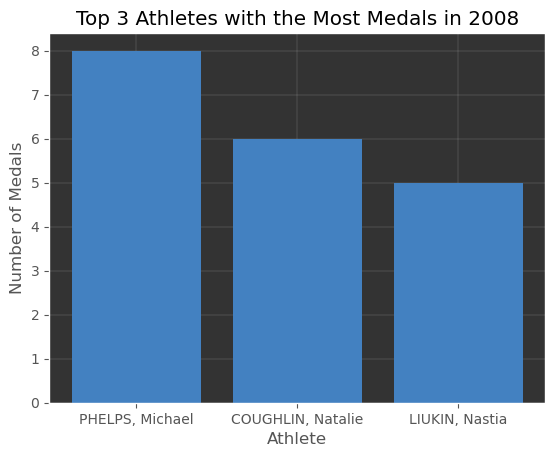

In [64]:
# Plot the number of medals of the top 3 athlete in 2008 using matplotlib.pyplot. using a bar chart

import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

plt.style.use('ggplot')

df_2008 = df[df['Edition'] == 2008]

# Group the data by athlete and calculate the total medals won
athlete_medals = df_2008.groupby('Athlete')['Medal'].count()

# Sort the medal counts in descending order and select the top three athletes
top_athletes = athlete_medals.nlargest(3)

# Create a bar chart for the top three athletes' medal counts
plt.bar(top_athletes.index, top_athletes.values, color = "#4381c1")

# Add labels and title
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.title('Top 3 Athletes with the Most Medals in 2008')

#Set grid color
plt.grid(True, color='w', linestyle='-', linewidth=0.1)
plt.gca().patch.set_facecolor('0.2')

# Display the bar chart
plt.show()

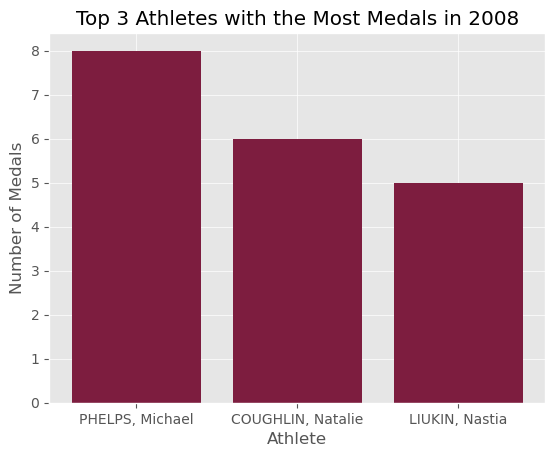

In [68]:
# use value_counts(); note the returned results is a Series. So, the x axis is the index of Series.

# Use value_counts() to count the number of medals for each athlete
athlete_medals = df_2008['Athlete'].value_counts()

# Select the top three athletes with the most medals
top_athletes = athlete_medals.head(3)

# Create a bar chart for the top three athletes' medal counts
plt.bar(top_athletes.index, top_athletes.values, color = "#7d1d3f")

# Add labels and title
plt.xlabel('Athlete')
plt.ylabel('Number of Medals')
plt.title('Top 3 Athletes with the Most Medals in 2008')

#Set grid color
plt.grid(True, color='w', linestyle='-', linewidth=0.5)
plt.gca().patch.set_facecolor('0.9')

# Display the bar chart
plt.show()

In [52]:
# Use list comprehension to define a new column "is_US". 
# When the country is USA, the value of is_US is True, otherwise the value is False

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/olympics.csv')

# Create a new column "US" using list comprehension
df['USA'] = [True if country == 'USA' else False for country in df['NOC']]

# Display the updated DataFrame
df4 = df.loc[(df['USA'] == True)]
df4

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,USA
11,Athens,1896,Athletics,Athletics,"LANE, Francis",USA,Men,100m,M,Bronze,True
13,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,100m,M,Gold,True
15,Athens,1896,Athletics,Athletics,"CURTIS, Thomas",USA,Men,110m hurdles,M,Gold,True
19,Athens,1896,Athletics,Athletics,"BLAKE, Arthur",USA,Men,1500m,M,Silver,True
21,Athens,1896,Athletics,Athletics,"BURKE, Thomas",USA,Men,400m,M,Gold,True
...,...,...,...,...,...,...,...,...,...,...,...
29098,Beijing,2008,Volleyball,Volleyball,"TOM, Logan",USA,Women,volleyball,W,Silver,True
29099,Beijing,2008,Volleyball,Volleyball,"WILLOUGHBY, Kim",USA,Women,volleyball,W,Silver,True
29151,Beijing,2008,Wrestling,Wrestling Free.,"CEJUDO, Henry",USA,Men,- 55kg,M,Gold,True
29161,Beijing,2008,Wrestling,Wrestling Free.,"MILLER, Randi",USA,Women,55 - 63kg,W,Bronze,True


In [56]:
# Hide the medal information for 1988 olympics; i.e., when edition is 1988, change the Medal as "Unknown".

# Update 'Medal' column for rows where edition is 1988
df.loc[df['Edition'] == 1988, 'Medal'] = 'Unknown'

# Display the updated DataFrame
df.loc[(df['Edition'] == 1988)]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal,USA
18051,Seoul,1988,Aquatics,Diving,"MENA CAMPOS, Jesus",MEX,Men,10m platform,M,Unknown,False
18052,Seoul,1988,Aquatics,Diving,"LOUGANIS, Gregory",USA,Men,10m platform,M,Unknown,True
18053,Seoul,1988,Aquatics,Diving,"XIONG, Ni",CHN,Men,10m platform,M,Unknown,False
18054,Seoul,1988,Aquatics,Diving,"WYLAND-WILLIAMS, Wendy Lian",USA,Women,10m platform,W,Unknown,True
18055,Seoul,1988,Aquatics,Diving,"XU, Yan-Mei",CHN,Women,10m platform,W,Unknown,False
...,...,...,...,...,...,...,...,...,...,...,...
19592,Seoul,1988,Wrestling,Wrestling Gre-R,"KOMCHEV, Atanas Slavov",BUL,Men,82 - 90kg (light-heavyweight),M,Unknown,False
19593,Seoul,1988,Wrestling,Wrestling Gre-R,"KOSKELA, Harri Matias",FIN,Men,82 - 90kg (light-heavyweight),M,Unknown,False
19594,Seoul,1988,Wrestling,Wrestling Gre-R,"KOSLOWSKI, Dennis Marvin",USA,Men,90 - 100kg (heavyweight),M,Unknown,True
19595,Seoul,1988,Wrestling,Wrestling Gre-R,"WRONSKI, Andrzej",POL,Men,90 - 100kg (heavyweight),M,Unknown,False
